## Importing packages

In [74]:
import pandas as pd
import numpy as np 
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , root_mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [6]:
pwd = os.getcwd()
data_folder = "data"
raw_folder = os.path.join(data_folder, "raw")
filepath = os.path.join(pwd, raw_folder, "housing.csv")

In [7]:
pricing_data = pd.read_csv(filepath)
pricing_data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


### Exploring data

In [4]:
pricing_data.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


In [8]:
pricing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


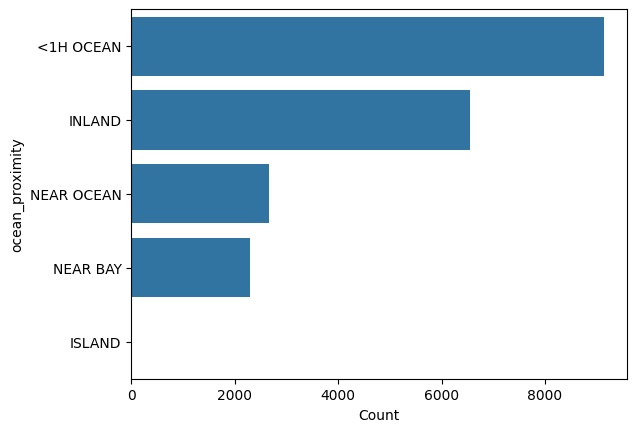

In [9]:
sns.barplot(pricing_data["ocean_proximity"].value_counts(), orient="h")
plt.xlabel("Count")
plt.show()

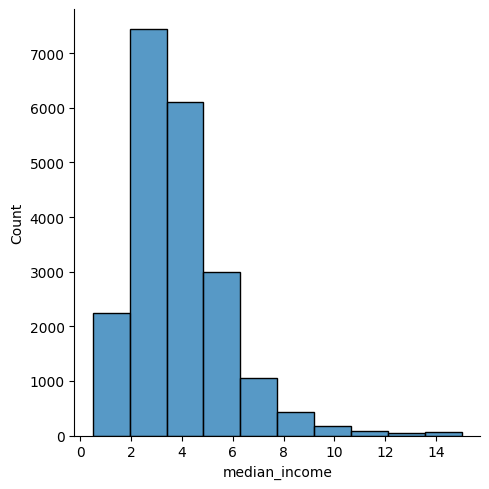

In [10]:
sns.displot(pricing_data["median_income"], kind="hist", bins=10)
plt.show()

In [11]:
pricing_data["sub_income"] = pd.cut(pricing_data["median_income"],bins=[0.,1.5,3.0,4.5,6.0,np.inf], labels = [1,2,3,4,5])
pricing_data["sub_income"].value_counts()

sub_income
3    7236
2    6581
4    3639
5    2362
1     822
Name: count, dtype: int64

<Axes: >

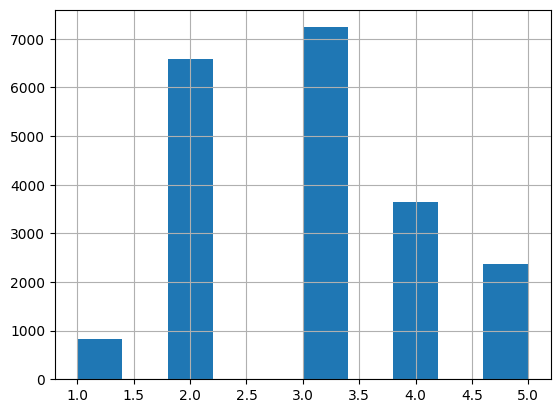

In [18]:
pricing_data["sub_income"].hist()

In [12]:
y = pricing_data["median_house_value"]
X = pricing_data.drop("median_house_value",axis=1)

### Split Datasets

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3 , random_state = 42)

In [14]:
X_train["median_income"].value_counts()/len(X_train)

median_income
2.6250     0.002699
15.0001    0.002561
3.1250     0.002492
4.1250     0.002284
2.8750     0.002076
             ...   
4.0375     0.000069
2.9506     0.000069
5.0677     0.000069
4.2432     0.000069
2.5755     0.000069
Name: count, Length: 9851, dtype: float64

In [15]:
X_test["median_income"].value_counts()/len(X_test)

median_income
4.0000    0.002907
2.8750    0.002584
2.3750    0.002422
3.0000    0.002261
2.1250    0.002261
            ...   
6.8870    0.000161
2.3900    0.000161
2.4318    0.000161
3.8897    0.000161
3.0520    0.000161
Name: count, Length: 4907, dtype: float64

The
#### Stratified Split
I used the stratified test in this case because the weight of the median_income will  cause bias in the model. 
It is used when you want to ensure that each split maintains the same proportion of classes as the original dataset. This is particularly important for imbalanced datasets where the number of instances of different classes is not equal.

In [16]:
split = StratifiedShuffleSplit(n_splits=1, test_size = 0.3, random_state = 42)
for train_index, test_index in split.split(pricing_data, pricing_data["sub_income"]):
    strat_train_set = pricing_data.loc[train_index]
    strat_test_set = pricing_data.loc[test_index]

In [17]:
 strat_train_set["sub_income"].value_counts()/len(strat_train_set)

sub_income
3    0.350568
2    0.318868
4    0.176287
5    0.114480
1    0.039798
Name: count, dtype: float64

In [18]:
 strat_test_set["sub_income"].value_counts()/len(strat_test_set)

sub_income
3    0.350614
2    0.318798
4    0.176357
5    0.114341
1    0.039890
Name: count, dtype: float64

In [19]:
def sub_income_proportions(data):
    """
    Calculates the proportions of each unique value in the 'sub_income' column of the given DataFrame.

    Parameters:
    data (pandas.DataFrame): The input DataFrame containing the 'sub_income' column.

    Returns:
    pandas.Series: A Series containing the proportions of each unique value in the 'sub_income' column.
    """
    return data["sub_income"].value_counts()/len(data)
train_set, test_set = train_test_split(pricing_data, test_size =0.3, random_state= 42)

compare_props = pd.DataFrame({
    "Overall":sub_income_proportions(pricing_data),
    "Stratified" : sub_income_proportions(strat_test_set),
    "Random" : sub_income_proportions(test_set),

}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
sub_income,,,,,
1,0.039826,0.039890,0.040859,2.595296,0.162206
2,0.318847,0.318798,0.321867,0.947171,-0.015195
3,0.350581,0.350614,0.353036,0.700203,0.009213
4,0.176308,0.176357,0.170543,-3.270129,0.027480
5,0.114438,0.114341,0.113695,-0.649167,-0.084674


In [20]:
strat_train_set.drop("sub_income" , axis = 1, inplace = True)
strat_test_set.drop("sub_income" , axis = 1, inplace = True)

### Visualizing

In [42]:
strat_train_copy= strat_train_set.copy()
strat_test_copy = strat_test_set.copy()

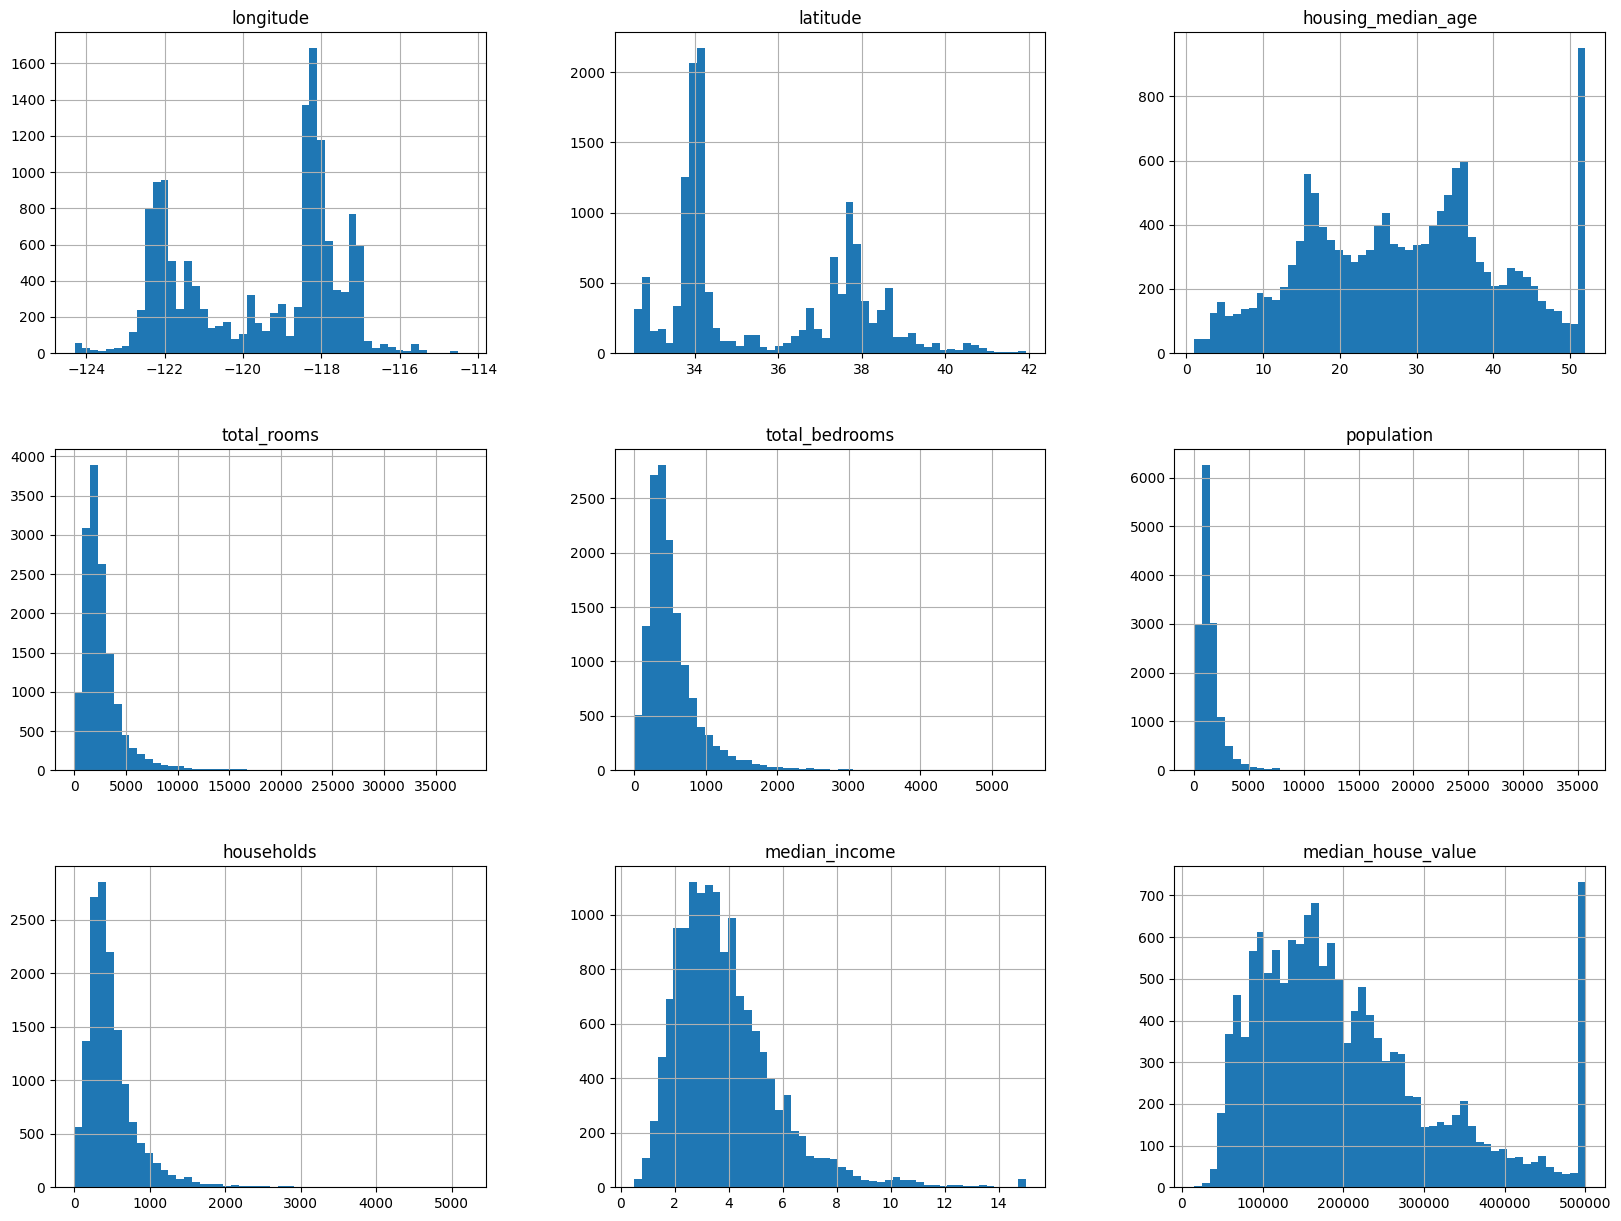

In [61]:
strat_train_copy.hist(bins = 50, figsize =(20,15))
plt.show()

<Axes: xlabel='longitude', ylabel='latitude'>

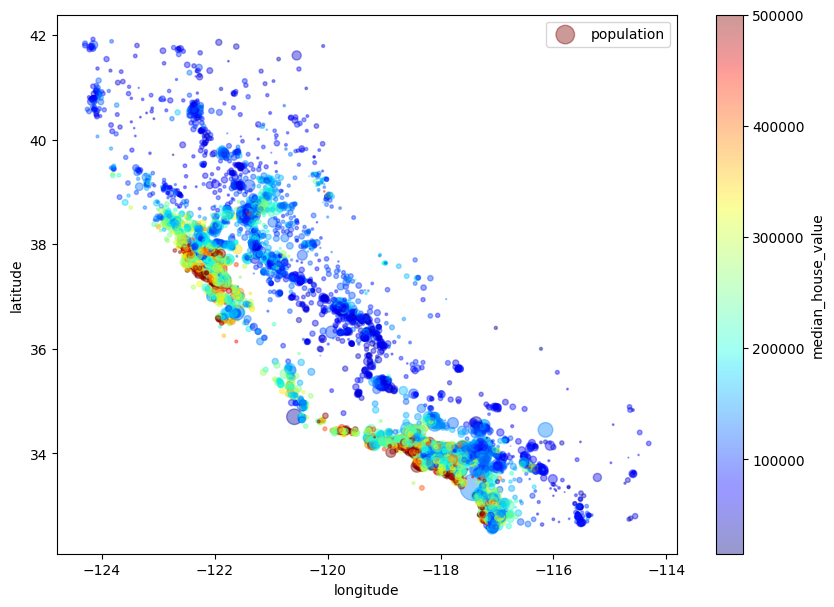

In [63]:
strat_train_copy.plot(kind="scatter", x="longitude",y="latitude", alpha = 0.4,
                      s= strat_train_copy["population"]/100,label="population",
                      figsize=(10,7), c="median_house_value",cmap=plt.get_cmap("jet"),
                      colorbar =True, sharex=False)

In order to visualise the correlation of the features, I had to convert all object data types to float
#### One Hot Encoding

In [23]:
strat_train_encoded = pd.get_dummies(strat_train_copy, dtype = int, drop_first = True)

##### Correlation matrix

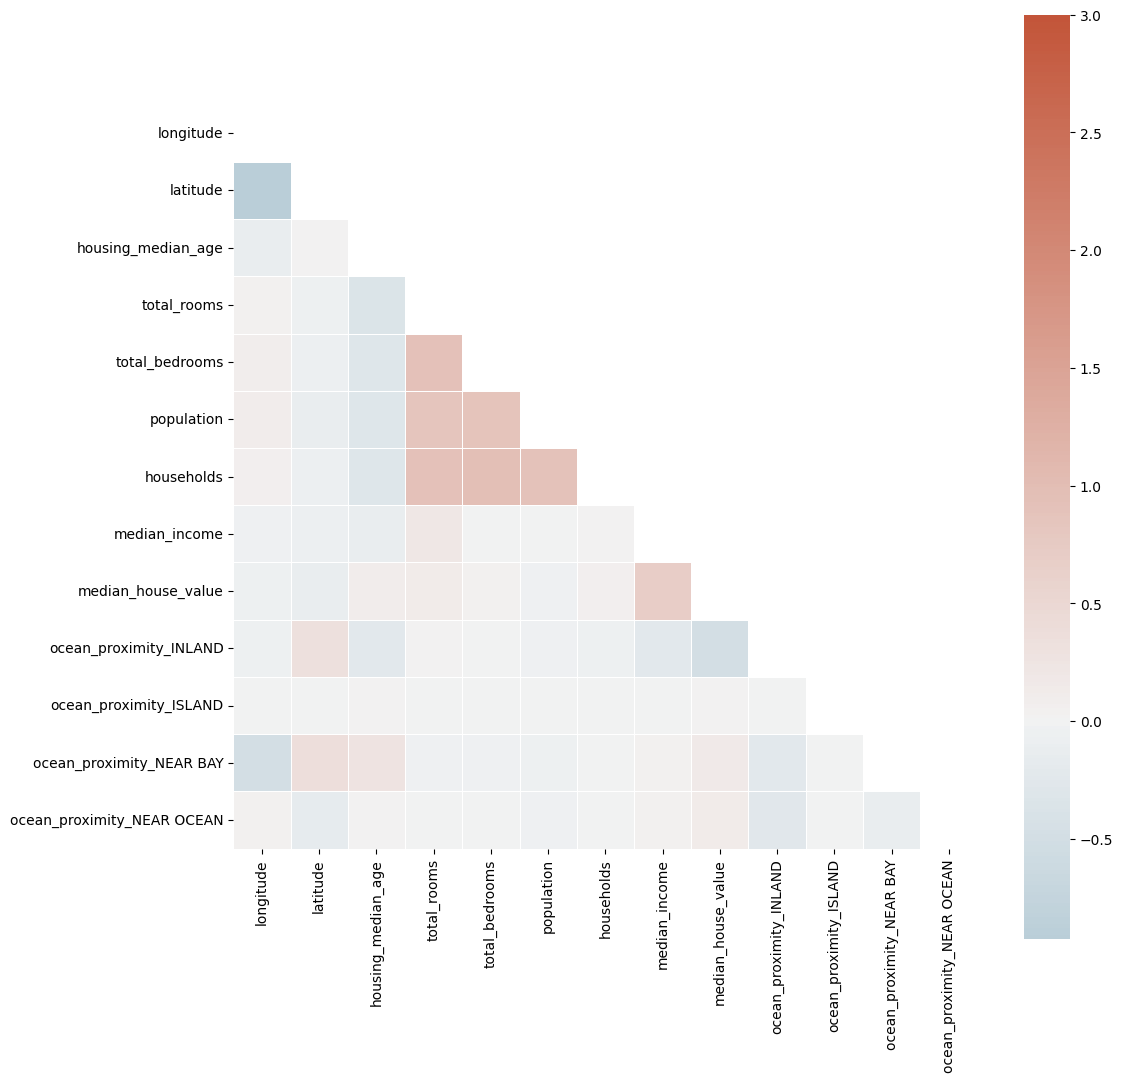

In [24]:
corr = strat_train_encoded.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230,20, as_cmap=True)
plt.figure(figsize=(12,12))
sns.heatmap(corr, mask=mask, cmap = cmap, vmax=3, center=0,square=True, linewidth=.5)
plt.show()

## Preparing Data for Machine Learning 


In [25]:
housing = strat_train_encoded.drop("median_house_value", axis = 1)
house_label = strat_train_encoded["median_house_value"]

In [83]:
missing = housing.isnull().sum()
missing

longitude                       0
latitude                        0
housing_median_age              0
total_rooms                     0
total_bedrooms                140
population                      0
households                      0
median_income                   0
ocean_proximity_INLAND          0
ocean_proximity_ISLAND          0
ocean_proximity_NEAR BAY        0
ocean_proximity_NEAR OCEAN      0
mod                             0
dtype: int64

In [79]:
range = housing["total_bedrooms"].max() - housing["total_bedrooms"].min()
range

5469.0

In [26]:
housing["total_bedrooms"] = housing["total_bedrooms"].fillna(housing["total_bedrooms"].mean())

In [107]:
housing.info()


<class 'pandas.core.frame.DataFrame'>
Index: 14448 entries, 8577 to 7730
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   14448 non-null  float64
 1   latitude                    14448 non-null  float64
 2   housing_median_age          14448 non-null  float64
 3   total_rooms                 14448 non-null  float64
 4   total_bedrooms              14448 non-null  float64
 5   population                  14448 non-null  float64
 6   households                  14448 non-null  float64
 7   median_income               14448 non-null  float64
 8   ocean_proximity_INLAND      14448 non-null  bool   
 9   ocean_proximity_ISLAND      14448 non-null  bool   
 10  ocean_proximity_NEAR BAY    14448 non-null  bool   
 11  ocean_proximity_NEAR OCEAN  14448 non-null  bool   
dtypes: bool(4), float64(8)
memory usage: 1.0 MB


In [27]:
imputer = SimpleImputer(strategy = "mean")

In [28]:
num_housing = housing.select_dtypes(include = [np.number])

In [29]:
num_housing_imputed = imputer.fit_transform(num_housing)
num_housing_imputed_df = pd.DataFrame(num_housing_imputed, columns=num_housing.columns)

### Feature Engineering

In [30]:
def feature_engineering(data):
    """
    Performs feature engineering on the input DataFrame by creating three new features:
    - bedrooms_per_household: The average number of bedrooms per household
    - population_per_household: The average population per household
    - rooms_per_household: The average number of rooms per household

    Parameters:
    data (pandas.DataFrame): The input DataFrame to be transformed.

    Returns:
    pandas.DataFrame: The input DataFrame with the new features added.
    """
    data["bedrooms_per_household"] = data["total_bedrooms"] / data["households"]
    data["population_per_household"] = data["population"] / data["households"]
    data["rooms_per_household"] = data["total_rooms"] / data["households"]
    return data

In [31]:
housing_featured_engineered = feature_engineering(housing)
housing_featured_engineered

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,bedrooms_per_household,population_per_household,rooms_per_household
8577,-118.41,33.89,31.0,1428.0,320.0,677.0,331.0,7.2316,0,0,0,0,0.966767,2.045317,4.314199
5960,-117.83,34.11,29.0,2671.0,437.0,1484.0,445.0,4.9844,1,0,0,0,0.982022,3.334831,6.002247
4753,-118.33,34.04,31.0,1090.0,251.0,955.0,239.0,2.9130,0,0,0,0,1.050209,3.995816,4.560669
15423,-117.26,33.20,13.0,3163.0,725.0,1675.0,629.0,2.8214,0,0,0,0,1.152623,2.662957,5.028617
9788,-120.51,35.91,39.0,768.0,162.0,264.0,118.0,5.3245,1,0,0,0,1.372881,2.237288,6.508475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13602,-117.25,34.15,30.0,1770.0,380.0,990.0,348.0,3.3000,1,0,0,0,1.091954,2.844828,5.086207
14693,-117.11,32.79,16.0,1791.0,518.0,1006.0,491.0,3.5179,0,0,0,1,1.054990,2.048880,3.647658
15591,-116.34,33.36,24.0,2746.0,514.0,731.0,295.0,3.3214,1,0,0,0,1.742373,2.477966,9.308475
5676,-118.29,33.71,36.0,3135.0,746.0,1815.0,697.0,3.7596,0,0,0,1,1.070301,2.604017,4.497848


#### Scaling Data

In [32]:
scaler = StandardScaler()
housing_scaled = scaler.fit_transform(housing_featured_engineered)

### Creating a Pipeline
This pipeline will perform all the preprocessing steps I did earlier on.

In [37]:
house = strat_train_set.drop("median_house_value", axis = 1)
house_labels = strat_train_set["median_house_value"]

def data_transformation(data):
    """
    Transforms the input data by performing feature engineering, imputing missing values,
    encoding categorical features, and scaling numerical features.

    Parameters:
    data (pd.DataFrame): The input DataFrame containing the features and optionally the target column "median_house_value".

    Returns:
    tuple: A tuple containing:
        - transformed_data (np.ndarray): The transformed feature array.
        - labels (pd.Series or None): The target values if "median_house_value" was in the input data, otherwise None.
        - feature_names (list): The list of feature names after transformation.
    """
    
    # Separate labels if present
    if "median_house_value" in data.columns:
        labels = data["median_house_value"]
        data = data.drop("median_house_value", axis=1)
    else:
        labels = None

    # Perform feature engineering
    engineered_data = feature_engineering(data)
    feature_names = list(engineered_data.columns)

    # Impute missing values in numerical features
    imputer = SimpleImputer(strategy="mean")
    numerical_data = engineered_data.select_dtypes(include=[np.number]) 
    imputed_numerical_data = imputer.fit_transform(numerical_data)

    # Encode categorical features
    categorical_data = engineered_data.select_dtypes(exclude=[np.number])
    cat_encoder = OneHotEncoder(sparse_output=False)
    encoded_categorical_data = cat_encoder.fit_transform(categorical_data)
    feature_names += cat_encoder.categories_[0].tolist()
    feature_names.remove("ocean_proximity")

    # Scale numerical features
    scaler = StandardScaler()
    scaled_numerical_data = scaler.fit_transform(imputed_numerical_data)

    # Combine scaled numerical and encoded categorical data
    transformed_data = np.hstack([scaled_numerical_data, encoded_categorical_data])

    return transformed_data, labels, feature_names

### Selecting and Training the model

In [40]:
train_data, train_labels, features = data_transformation(strat_train_copy)
train_data

array([[ 0.58073699, -0.81762236,  0.17952267, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.87028331, -0.7144537 ,  0.02047048, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.62067442, -0.74728009,  0.17952267, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.61411781, -1.06616502, -0.37715998, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.64064313, -0.90203308,  0.57715313, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.72051797, -0.80355391,  0.57715313, ...,  0.        ,
         0.        ,  0.        ]])

In [43]:
test_data, test_labels, features = data_transformation(strat_test_copy)
test_data

array([[-1.20675703,  0.78453296,  0.28564156, ...,  0.        ,
         0.        ,  0.        ],
       [-1.3414692 ,  0.86848934,  1.15816905, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.68420268, -0.76866007,  0.36496224, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.71413871, -0.84328796,  1.23748973, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.22305135, -1.27239835, -0.98348933, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.13823258, -0.70336066,  1.47545177, ...,  0.        ,
         0.        ,  0.        ]])

### Linear Regression 


In [46]:
lin_model = LinearRegression()
lin_model.fit(train_data, train_labels)

LinearRegression()

In [48]:
actual_val = test_labels[:5]
predicted_val = lin_model.predict(test_data[:5])

comp_df = pd.DataFrame(data={"Actual Values":actual_val, "Predicted Values":predicted_val})
comp_df["Differences"] = comp_df["Actual Values"] - comp_df["Predicted Values"]
comp_df

,Actual Values,Predicted Values,Differences
17966,288900.0,314670.999377,-25770.999377
17037,349600.0,276133.796996,73466.203004
7313,189600.0,130692.012893,58907.987107
2639,76800.0,143240.385302,-66440.385302
10119,198200.0,243016.054086,-44816.054086


In [59]:
lin_mse = mean_squared_error(actual_val,predicted_val)
lin_rmse = root_mean_squared_error(actual_val, predicted_val)
lin_mae = mean_absolute_error(actual_val,predicted_val)
print(f"The mean squared error : {lin_mse}")
print(f"The root mean squared error : {lin_rmse}")
print(f"The mean absolute error : {lin_mae}")

The mean squared error : 3190876368.1062994
The root mean squared error : 56487.84265756924
The mean absolute error : 53880.32577509419


### Decision Tree

In [58]:
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(train_data, train_labels)

DecisionTreeRegressor(random_state=42)

In [63]:
tree_predicted_val = tree_model.predict(test_data[:5])
tree_mse = mean_squared_error(actual_val, tree_predicted_val)
tree_rmse = root_mean_squared_error(actual_val, tree_predicted_val)
tree_mae = mean_absolute_error(actual_val, tree_predicted_val)
print(f"The mean squared error : {tree_mse}")
print(f"The root mean squared error : {tree_rmse}")
print(f"The mean absolute error : {tree_mae}")

The mean squared error : 3419108000.0
The root mean squared error : 58473.13913242558
The mean absolute error : 48400.0


In [69]:
scores = cross_val_score(tree_model, test_data,test_labels, scoring = "neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [70]:
def display_scores(scores):
    print("Scores : ",scores)
    print("Mean : ", scores.mean())
    print("Standard deviation : ", scores.std())

display_scores(tree_rmse_scores)

Scores :  [74490.48232369 75065.00534312 70102.92657991 71110.40041971
 78948.24939841 76657.64948944 81948.69078202 77867.86745681
 82530.88878868 79261.70331256]
Mean :  76798.3863894346
Standard deviation :  3959.217781638042


### Random Forest

In [68]:
forest_model = RandomForestRegressor(n_estimators = 100, random_state=42)
forest_model.fit(train_data, train_labels)


RandomForestRegressor(random_state=42)

In [71]:
test_pred = forest_model.predict(test_data[:5])
forest_mse = mean_squared_error(actual_val, test_pred)
forest_rmse = root_mean_squared_error(actual_val, test_pred)
forest_mae = mean_absolute_error(actual_val, test_pred)
forest_rmse

47009.333998685834

In [73]:
forest_scores = cross_val_score(forest_model, test_data,test_labels, scoring = "neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores :  [53354.78232136 52948.67511699 54513.40035388 51154.03540655
 48173.40230298 54321.60016036 55229.21589962 56573.73061912
 56213.78832452 54390.7799966 ]
Mean :  53687.3410501975
Standard deviation :  2369.5658722510116
